# Cinematique : position, vitesse et accélération.
---
<div style="text-align: center;">
    <div style="display: inline-block; position: relative; width: 350px;">
        <img src="../img/_68f9688a-19d4-4a3b-97dc-c3ac11ee12f1.jpeg" alt="Dessin" style="width: 100%;"/>
        <p style="text-align: center; margin-top: 5px;">
            <span style="font-style: italic; font-size: 16px;"> Trajectoires</span><br/>
            <span style="font-style: italic; font-size: 12px;">Image générée par DALL·E 3, 2024 </span>
        </p>
    </div>
</div>

---
## Mise en contexte :

Dans cet exemple, nous avons un enregistrement d'une position en fonction du temps. À partir de cet enregistrement, nous pouvons calculer la vitesse et l'accélération à l'aide la méthode des différences finies.

## Objectifs :

- Appliquer la méthode par le biais d'une fonction
- Appliquer une moyenne mobile pour lisser une courbe

### Définition analytique

La vitesse $v$ d'un objet en mouvement, en fonction du temps $t$, est définie comme la dérivée première de sa position $s$ par rapport au temps. Mathématiquement, cela s'exprime comme suit :

$$ v(t) = \frac{ds(t)}{dt} $$

Cette équation indique que la vitesse instantanée à un instant donné $t$ est égale à la dérivée de la position $s$ par rapport au temps $t$. En d'autres termes, la vitesse représente la variation de la position par rapport au temps.

Pour l'accélération, c'est la même logique, mais avec la fonction de la vitesse. L'accélération $a$, en fonction du temps $t$, est définie comme la dérivée première de la vitesse $v$ par rapport au temps. Mathématiquement, cela s'exprime comme suit :

$$ a(t) = \frac{dv(t)}{dt} $$

Cette équation indique que l'accélération instantanée à un instant donné $t$ est égale à la dérivée de la vitesse $v$ par rapport au temps $t$. En d'autres termes, l'accélération représente la variation de la vitesse par rapport au temps.

### Approximation numérique

Les différences finies est une méthode numérique couramment utilisée pour approximer  les dérivées. Cette approche repose sur la discrétisation des grandeurs. 

Considérons une séquence discrète de positions $s_i$ enregistrées à des instants $t_i$. La vitesse $v_i$ à l'instant $t_i$ peut être estimée en utilisant la différence finie centrale pour la dérivée première. La formule associée à cette estimation est la suivante :

$$ v_i = \frac{s_{i+1} - s_{i-1}}{t_{i+1} - t_{i-1}} $$

Cette formule exprime la pente du segment reliant les points $s_{i-1}$ et $s_{i+1}$. En utilisant cette méthode, la vitesse au point $t_i$ est ainsi calculée.

Pour estimer l'accélération $a_i$ à l'instant $t_i$, la différence finie centrale peut être appliquée une nouvelle fois à la séquence des vitesses $v_i$ obtenues précédemment. La formule correspondante a la même forme :

$$ a_i = \frac{v_{i+1} - v_{i-1}}{t_{i+1} - t_{i-1}} $$

En d'autres termes, l'accélération est calculée comme la variation de la vitesse par rapport au temps, en prenant en compte les points voisins. 

Il convient de souligner que l'efficacité de cette méthode dépend de la qualité des données expérimentales et de la finesse de la discrétisation temporelle. Des intervalles de temps trop grands peuvent introduire des erreurs significatives, tandis qu'une discrétisation fine peut augmenter la précision des résultats au prix d'une augmentation de la charge de calcul.

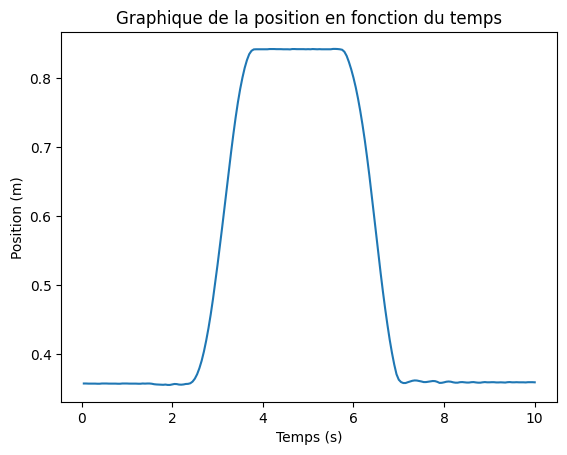

In [1]:
## ---------------------------------------------------------
## Importation des données: 

# Créer une liste vide pour stocker les valeurs de temps
temps = []

# Créer une liste vide pour stocker les valeurs de position
position = []

# Ouvrir le fichier "Cinematique-1D-accandstop.txt" en mode lecture ('r')
with open("../data/Cinematique-1D-accandstop.txt", 'r') as fichier:
    
    # Ignorer les 7 premières lignes du fichier
    for i in range(7):
        fichier.readline()

    # Lire toutes les lignes restantes du fichier et les stocker dans la liste "lignes"
    lignes = fichier.readlines()
    
    # Parcourir chaque ligne dans la liste "lignes"
    for ligne in lignes:
        # Supprimer les caractères de nouvelle ligne et diviser la ligne en colonnes
        colonnes = ligne.strip().split()
        
        # Convertir la première colonne (temps) en nombre décimal et l'ajouter à la liste "temps"
        temps.append(float(colonnes[0]))
        
        # Convertir la deuxième colonne (position) en nombre décimal et l'ajouter à la liste "position"
        position.append(float(colonnes[1]))

## ---------------------------------------------------------
## Visualisation des données:

import matplotlib.pyplot as plt

plt.plot(temps, position, label='Position en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Position (m)')
plt.title('Graphique de la position en fonction du temps')
plt.show()

In [2]:
## ---------------------------------------------------------
## Definition d'une fonction de différence finie : 

def derivee_premiere_difference_finie(liste_temps, liste_variable):
    # Création d'une liste pour stocker les valeurs de la dérivée première
    derivee_premiere = []

    # Calcul de la dérivée première à l'aide de la méthode de différence finie (le premier et le dernier temps est exclus)
    for i in range(1, len(liste_temps)-1):
        # Calcul du changement dans le temps et le changement dans la variable
        delta_temps = liste_temps[i+1] - liste_temps[i-1]
        delta_variable = liste_variable[i+1] - liste_variable[i-1]

        # Calcul de la dérivée première en utilisant la différence finie et l'ajout à la liste des dérivées
        derivee_premiere.append(delta_variable / delta_temps)

    # Renvoi de la liste contenant les valeurs de la dérivée première
    return derivee_premiere

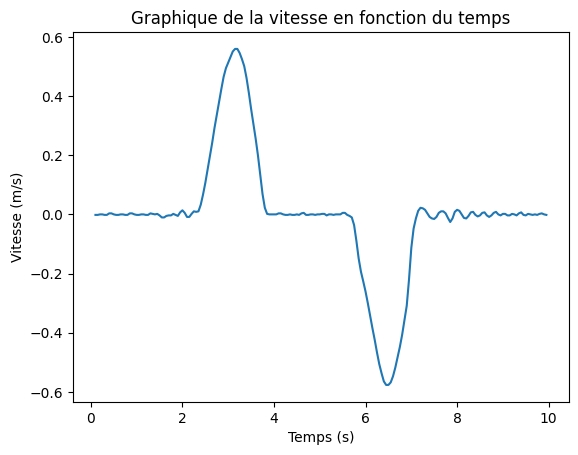

In [3]:
## ---------------------------------------------------------
## Calcul de la vitesse avec la fonction:

vitesse = derivee_premiere_difference_finie(temps, position)

## ---------------------------------------------------------
## Visualisation du résultat:

plt.plot(temps[1:-1], vitesse, label='Vitesse en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Vitesse (m/s)')
plt.title('Graphique de la vitesse en fonction du temps')
plt.show()

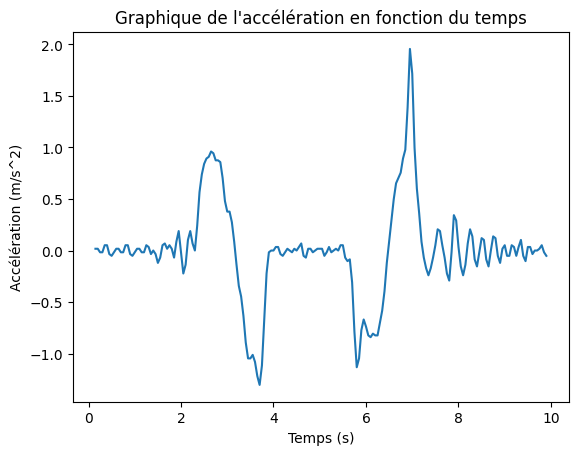

In [4]:
## ---------------------------------------------------------
## Calcul de l'accelération avec la fonction de différence finie: (On note que nous devons diminuer à nouveau la longeur de liste en omettant le premier et le dernier point.)

acceleration = derivee_premiere_difference_finie(temps[1:-1], vitesse)

## ---------------------------------------------------------
## Visualisation du résultat:

plt.plot(temps[2:-2], acceleration, label='Acceleration en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Accélération (m/s^2)')
plt.title("Graphique de l'accélération en fonction du temps")
plt.show()

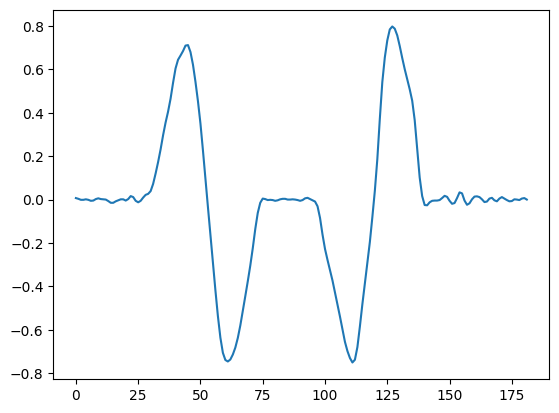

In [5]:
# On remarque que le résultat devient de plus en plus bruité. 
# Nous pouvons appliquer la méthode de la moyenne mobile pour lisser la courbe. La moyenne mobile est une technique statistique qui lisse les variations dans les données en calculant la moyenne des valeurs sur une fenêtre glissante de taille fixe.  

## ---------------------------------------------------------
## Definition d'une fonction de moyenne mobile

def moyenne_mobile(liste, fenetre):
    # Création d'une liste pour stocker les valeurs de la moyenne mobile
    moyenne_mobile_tab = []

    # Parcours des indices de la liste pour calculer la moyenne mobile
    for i in range(len(liste) - fenetre + 1):
        # Calcul de la moyenne sur la fenêtre spécifiée
        moyenne = sum(liste[i:i+fenetre]) / fenetre
        # Ajout de la moyenne calculée à la liste des moyennes mobiles
        moyenne_mobile_tab.append(moyenne)

    # Renvoi de la liste contenant les valeurs de la moyenne mobile
    return moyenne_mobile_tab

## ---------------------------------------------------------
## Application de la moyenne mobile:

fenetre = 15
acceleration_lisse = moyenne_mobile(acceleration, fenetre)

plt.plot(acceleration_lisse, label='Acceleration en fonction du temps')
plt.show()